In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

from scipy.stats import mannwhitneyu

In [14]:
patient_df = pd.read_csv('violin_plot_data_updated.csv')

In [15]:
patient_df.columns

Index(['Type', '_____', 'Name', 'Gender', 'Age', 'PD Stage', 'VK2', 'VD', 'TC',
       'HDL-C', 'LDL-C', 'CRP', 'UA', 'WBC',
       'Neutrophil-Lymphocyte Ratio (NLR)'],
      dtype='object')

In [16]:
patient_df['Neutrophil-Lymphocyte Ratio (NLR)']

0      1.33
1      1.56
2      2.57
3      1.86
4      1.50
       ... 
196    1.56
197    1.56
198    1.27
199    1.13
200    1.13
Name: Neutrophil-Lymphocyte Ratio (NLR), Length: 201, dtype: float64

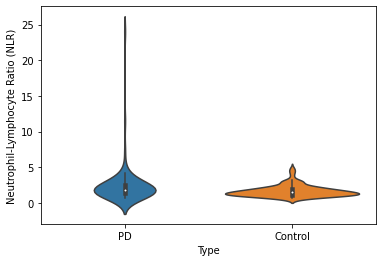

In [17]:
#Neutrophil-Lymphocyte Ratio
sns.violinplot(x = "Type", y = 'Neutrophil-Lymphocyte Ratio (NLR)', data=patient_df)
plt.show()

In [23]:
case_df = patient_df.loc[patient_df.Type == "PD"]
control_df = patient_df.loc[patient_df.Type != "PD"]

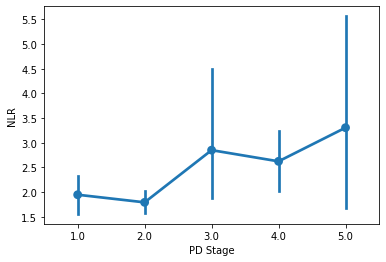

In [21]:
sns.pointplot(data=case_df, x=case_df.loc[case_df["PD Stage"] != 2.5]['PD Stage'].astype(float), 
              y = case_df.loc[case_df["PD Stage"] != 2.5]['Neutrophil-Lymphocyte Ratio (NLR)'].astype(float))
plt.ylabel("NLR")
plt.show()

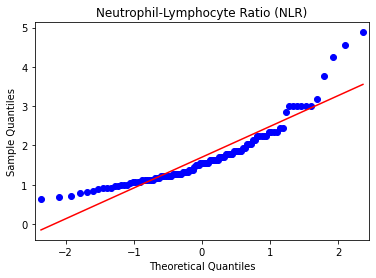

In [24]:
par_list = ['Neutrophil-Lymphocyte Ratio (NLR)']
for i in par_list:
    qqplot(control_df[i].dropna().astype(float), line='s')
    plt.title(i)
    plt.show()

In [25]:
for i in par_list:
    stat, p = mannwhitneyu(case_df[i].dropna().astype(float), control_df[i].dropna().astype(float))
    print(i)
    print(np.mean(case_df[i].dropna().astype(float)))
    print(np.std(case_df[i].dropna().astype(float)))
    
    print(np.mean(control_df[i].dropna().astype(float)))
    print(np.std(control_df[i].dropna().astype(float)))
    print("Mann White resutls:", stat, p)

Neutrophil-Lymphocyte Ratio (NLR)
2.3763043478260863
2.661350881801957
1.7019266055045874
0.7837424650317105
Mann White resutls: 3694.5 0.0006567852713681195
